# Bonus Problem 5

Problem details:

\begin{equation*}
    \underset{x \in \mathbb{R}^{n}}{\text{miminize}} \, || Ax - b ||_2^2 + \lambda || x || _1 
\end{equation*}

Where $A \in \mathbb{R}^{m \times n}$ , $b \in \mathbb{R}^m$ and $\lambda > 0 $. 

This gives: 

\begin{equation*}
    f(x) = || Ax - b ||_2^2
\end{equation*}

And: 
\begin{equation*}
    g(x) = \lambda || x ||_1  = \sum_{i=1}^n \lambda |x_i|
\end{equation*}

Alternatively we can formulate the problem as: 

\begin{equation}
    \underset{x \in \mathbb{R}^{n}}{\text{miminize}} \, F(x) 
\end{equation}

where $F(x) = f(x) + g(x)$.

We note that $f$ is differentiable with the gradient:

\begin{equation*}
    \nabla f(x) = \nabla ((Ax + b)^T (Ax + b)) = \nabla (x^T A^T A x + b^T A x + (Ax)^T b + b^T b) = 2 A^T A x + 2 A^T b = 2A^T (Ax + b) 
\end{equation*}

We note that $g(x)$ is separable, and that the terms are scaled absolute values: $g_i(x_i) = \lambda |x_i|$, which we know are convex since: 

\begin{align*}
    g_i(\theta y + (1 - \theta) z)  & =    \lambda |\theta y + (1 - \theta) z| \\ 
                                    & \leq \lambda (| \theta y | +  | (1 - \theta) z|) \\ 
                                    & =    \theta | \lambda y | +  (1 - \theta) | \lambda z| \\
                                    & =    \theta g_i(y) + (1 - \theta) g_i(z)
\end{align*}

For all $x, y \in \mathbb{R} $, $\theta \in [0, 1]$, $\lambda > 0$.

The subdifferential of $g_i(x_i) = \lambda |x_i|$ is therefore the following: 

\begin{equation*}
    \partial g_i(x) = 
    \begin{cases}
        \{-\lambda\}                                      , & x_i < 0 \text{ since } g_i \text{ is differentiable here} \\
        cl(conv[-\lambda, \lambda]) = [-\lambda, \lambda] , & x_i = 0 \text{ since } g_i \text{ convex}  \\  
        \{\lambda\}                                       , & x_i > 0 \text{ since } g_i \text{ is differentiable here} \\
    \end{cases} 
\end{equation*}

In the ISTA and FISTA methods, the method $p_L(y)$ is used. This method returns the unique minimizer to a quadratic approximation $Q_L$ of the function $F(x) = f(x) + g(x)$. The quadratic approximation for any $L > 0$ at a point $y \in \mathbb{R}^n $ is defined as: 

\begin{equation*}
    Q_L(x, y) = f(y) + (x - y)^T \nabla f(y) + \frac{L}{2} || x - y ||_2^2 + g(x) 
\end{equation*}

This results in the $p_L(y)$ being the following expression: 

\begin{equation*}
    p_L(y) = \underset{x \in \mathbb{R}^n}{\text{argmin}} \left\{ g(x) + \frac{L}{2} \left|\left| x - y + \frac{1}{L} \nabla f(y) \right|\right|_2^2 \right\}
\end{equation*}

This is equivalent to taking the prox in respect to $g$, with the input $z = y - \frac{1}{L} \nabla f(y)$ and a step size of $\gamma = 1/L$: 

\begin{equation*}
    prox_{\gamma g}(z) = \underset{x \in \mathbb{R}^n}{\text{argmin}} \left\{ g(x) + \frac{1}{2\gamma} \left|\left| x - z \right|\right|_2^2 \right\}
\end{equation*}

For the Adaptive proximal gradient method described by Y. Malitsky and K. Mishchenko, a step in the Algorithm is to take the $prox_{\alpha_k g}(z^k)$ of the input $z^k = x^k - \alpha_k \nabla f(x^k)$. 

To calculate the prox efficiently we need to derive an explicit expression. We start by noting that since $g(x)$ is separable, the $prox_{\alpha_k g}(z)$ is separable: $prox_{\alpha_k g}(z) = (prox_{\alpha_k g_1}(z_1), ... , prox_{\alpha_k g_n}(z_n)) $. Where $g_i(x_i) = |x_i|$ 

Applying Fermat's rule to the expression: $x_i = prox_{\gamma g}(z_i)$, gives the following expression: 

\begin{equation*}
    0 \in \partial g_i(x_i) + \gamma^{-1} (x_i - z_i)
\end{equation*}

Using the previously stated definition of $\partial g_i(x_i)$ gives three cases: $x_i < 0, x_i = 0, x_i > 0 $.

For the case $x_i < 0, \partial g(x) = \{-\lambda\}$, which gives:

\begin{equation*}
    0 = -\lambda + \gamma^{-1}(x_i - z_i) \iff x_i = z_i + \gamma \lambda 
\end{equation*}

Which also implies that $z_i < -\gamma \lambda$ since $x_i < 0$.

For the case $x_i = 0, \partial g(x) = [-\lambda, \lambda]$, which gives:

\begin{equation*}
    0 \in [-\lambda, \lambda] - \gamma^{-1} z_i \iff z_i \in [-\gamma \lambda, \gamma \lambda] 
\end{equation*}

For the case $x_i > 0, \partial g(x) = \{\lambda\}$, which gives:

\begin{equation*}
    0 = \lambda + \gamma^{-1}(x_i - z_i) \iff x_i = z_i - \gamma \lambda 
\end{equation*}

Which also implies that $z_i > \gamma \lambda$ since $x_i > 0$.

This gives the final expression of the $prox_{\gamma g}$: 

\begin{equation*}
    prox_{\gamma g}(z) = (x_1, ..., x_n) = 
    \begin{cases}
        x_i = z_i + \gamma \lambda, & z_i < -\gamma \lambda \\
        x_i = 0 ,                   & z_i \in [-\gamma \lambda, \gamma \lambda] \\
        x_i = z_i - \gamma \lambda, & z_i > \gamma \lambda \\
    \end{cases}
\end{equation*}



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import cvxpy as cp

In [2]:
# Data specification: 
m = 100
n = 1000

A = np.random.randn(m, n)
b = np.random.randn(m)
lambda_ = max(A.T @ b) / 10 

In [3]:
# We find the optimal value of the problem using the CVXPY library
x = cp.Variable(n)
objective = cp.Minimize((cp.norm(A @ x - b, 2)**2) + lambda_ * cp.norm(x, 1))
prob = cp.Problem(objective)

result = prob.solve()
solution = x.value
print(f"Optimal value of the problem: {result}")

Optimal value of the problem: 12.964621450605028


In [4]:
def grad_f(A, b, x):
    """Calculates the gradient of the function f in the LASSO problem at point x.

    Args:
        A (np.array): The matrix A in the LASSO problem with dim: m x n.
        b (np.array): The vector b in the LASSO problem with dim: m x 1.
        x (np.array): The position to calculate the gradient at.

    Returns:
        np.array: The gradient of the function at x.
    """
    return 2*A.T @ (A @ x - b)

def prox_g(lambda_, gamma, z): 
    """The proximal operator for the function g(x) = lambda * || x ||_1.

    Args:
        gamma (float): The step size for the proximal operator.
        z (np.array): The position to calculate the proximal operator at.

    Returns:
        np.array: The result of the proximal operator.
    """
    n = z.shape[0]
    x = np.zeros(n)
    for i in range(n):
        if z[i] > lambda_ * gamma:
            x[i] = z[i] - lambda_ * gamma
        elif z[i] < -lambda_ * gamma:
            x[i] = z[i] + lambda_ * gamma
        else:
            x[i] = 0
    return x

def p_L(A, b, lambda_, L, y)-> np.array:
    """A helper function for the FISTA algorithm. It calculates the proximal operator of the gradient step starting at y.

    Args:
        A (np.array): The matrix A in the LASSO problem with dim: m x n.
        b (np.array): The vector b in the LASSO problem with dim: m x 1.
        lambda_ (float): The lambda value in the LASSO problem.
        L (float): The Lipschitz constant for the gradient of the function f.
        y (np.array): The starting point for the helper method.

    Returns:
        np.array: The resulting point after the gradient step and proximal operator.
    """
    z = y - 1/L * grad_f(A, b, y)
    return prox_g(lambda_, 1/L, z)

def FISTA(A, b, lambda_, x_0, max_iterations=1000):
    """Implementation of the FISTA algorithm for solving the LASSO problem.

    Args:
        A (np.array): The matrix A in the LASSO problem with dim: m x n.
        b (np.array): The vector b in the LASSO problem with dim: m x 1.
        lambda_ (float): The lambda value in the LASSO problem.
        x_0 (np.array): Starting position for the algorithm.
        max_iterations (int, optional): The max number of iterations to run the algorithm for. Defaults to 1000.

    Returns:
        (List, List): A tuple containing two lists. The first list contains all the x values found during the iterations. 
        The second list contains the best function evaluation found during the iterations.
    """
    L = 2 * max(np.linalg.eigvalsh(A.T @ A)) # This is the smallest Lipschitz constant for the gradient of f 
                                             # according to the paper by A. Beck and M. Teboulle. (See example 2.2 in the paper)

    x_prev = x_0
    y_cur = x_0
    t_cur = 1

    best_evaluation = F(A, b, lambda_, x_0)
    x_best_evaluations = [best_evaluation] 
    x_iterations = [x_0]
    for _k in range(max_iterations):
        x_cur = p_L(A, b, lambda_, L, y_cur)
        t_next = (1 + np.sqrt(1 + 4 * (t_cur**2) )) / 2
        y_next = x_cur + (t_cur - 1) / t_next * (x_cur - x_prev)

        t_cur = t_next
        y_cur = y_next
        x_prev = x_cur

        # Storing the results in vectors:
        x_evaluation = F(A, b, lambda_, x_cur) 
        if x_evaluation < best_evaluation: 
            best_evaluation = x_evaluation
        x_best_evaluations.append(best_evaluation) 

        x_iterations.append(x_cur)

    return x_iterations, x_best_evaluations

def f(A, b, x):
    """Calculates the value of the function f in the LASSO problem at point x.
    The function is defined as: f(x) = (|| A^T x - b ||_2) ^2

    Args:
        A (np.array): A matrix of size m x n.
        b (np.array): A vector of size m x 1.
        x (np.array): The position to calculate the value at. A vector of size n x 1.

    Returns:
        float: The value of the function at x.
    """
    return np.linalg.norm(A @ x - b, 2)**2

def g(lambda_, x):
    """Calculates the value of the function g in the LASSO problem at point x.
    The function is defined as: g(x) = lambda * || x ||_1

    Args:
        lambda_ (float): The lambda value in the LASSO problem.
        x (np.array): The position to calculate the value at. A vector of size n x 1.

    Returns:
        float: The value of the function at x.
    """
    return lambda_ * np.linalg.norm(x, 1)

def F(A, b, lambda_, x):
    """Calculates the value of the function F in the LASSO problem at point x.
    The function is defined as: F(x) = f(x) + g(x)

    Args:
        A (np.array): A matrix of size m x n.
        b (np.array): A vector of size m x 1.
        lambda_ (float): The lambda value in the LASSO problem.
        x (np.array): The position to calculate the value at. A vector of size n x 1.

    Returns:
        float: The value of the function at x.
    """
    return f(A, b, x) + g(lambda_, x)

In [5]:
def adaptive_proximal_gradient(A, b, lambda_, alpha_0, x_0, max_iterations=1000):
    """Implementation of the adaptive proximal gradient algorithm for solving the LASSO problem.

    Args:
        A (np.array): The matrix A in the LASSO problem with dim: m x n.
        b (np.array): The vector b in the LASSO problem with dim: m x 1.
        lambda_ (float): The lambda value in the LASSO problem.
        alpha_0 (float): The initial step size for the algorithm.
        x_0 (np.array): The starting position for the algorithm.
        max_iterations (int, optional): The maximal number of iterations to run the algorithm. Defaults to 1000.

    Returns:
        (List, List): A tuple containing two lists. The first list contains all the x values found during the iterations. 
        The second list contains the best function evaluation found during the iterations.
    """
    alpha_prev = alpha_0 
    theta_prev = 1/3
    x_prev = x_0
    z_cur = x_0 - alpha_0 * grad_f(A, b, x_0)
    x_cur = prox_g(lambda_, alpha_0, z_cur)
    
    best_evaluation = F(A, b, lambda_, x_cur)
    x_best_evaluations = [best_evaluation] 
    x_iterations = [x_cur]

    for k in range(max_iterations):
        L_cur = np.linalg.norm(grad_f(A, b, x_cur) - grad_f(A, b, x_prev), 2) / np.linalg.norm(x_cur - x_prev, 2)
        
        if k == 0: 
            print(f"L_1*alpha_0: {L_cur*alpha_0}")
        
        alpha_candidate_1 = np.sqrt(2/3 + theta_prev) * alpha_prev
        if 2*(alpha_prev**2)*(L_cur**2) - 1 < 0: 
            alpha_cur = alpha_candidate_1
        else:
            alpha_candidate_2 = alpha_prev / np.sqrt(max(0, 2*(alpha_prev**2)*(L_cur**2) - 1))
            alpha_cur = min(alpha_candidate_1, alpha_candidate_2)

        z_next = x_cur - alpha_cur * grad_f(A, b, x_cur)
        x_next = prox_g(lambda_, alpha_cur, z_next)
        theta_cur = alpha_cur / alpha_prev

        # Updating the variables: 
        theta_prev = theta_cur
        alpha_prev = alpha_cur
        x_prev = x_cur
        x_cur = x_next

        # Storing the results in vectors:
        x_evaluation = F(A, b, lambda_, x_cur) 
        if x_evaluation < best_evaluation: 
            best_evaluation = x_evaluation
        x_best_evaluations.append(best_evaluation) 

        x_iterations.append(x_cur)

    return x_iterations, x_best_evaluations

In [6]:
# Solving the problem with the cvxpy library:
x = cp.Variable(n)
objective = cp.Minimize((cp.norm(A @ x - b, 2)**2) + lambda_ * cp.norm(x, 1))
problem = cp.Problem(objective)
cvxpy_optimal_value = problem.solve()

In [7]:
# Running the FISTA algorithm:
x_0 = np.random.randn(n)
x_iterations_fista, x_best_evals_fista = FISTA(A, b, lambda_, x_0, 3000)
objective_values_fista = [F(A, b, lambda_, x) for x in x_iterations_fista]


In [8]:
# Running the adaptive proximal gradient algorithm:
alpha_0 = 1/2000
x_iterations_apg, x_best_evals_apg = adaptive_proximal_gradient(A, b, lambda_, alpha_0, x_0, 3000)
objective_values_apg = [F(A, b, lambda_, x) for x in x_iterations_apg]

L_1*alpha_0: 1.1173403904967272


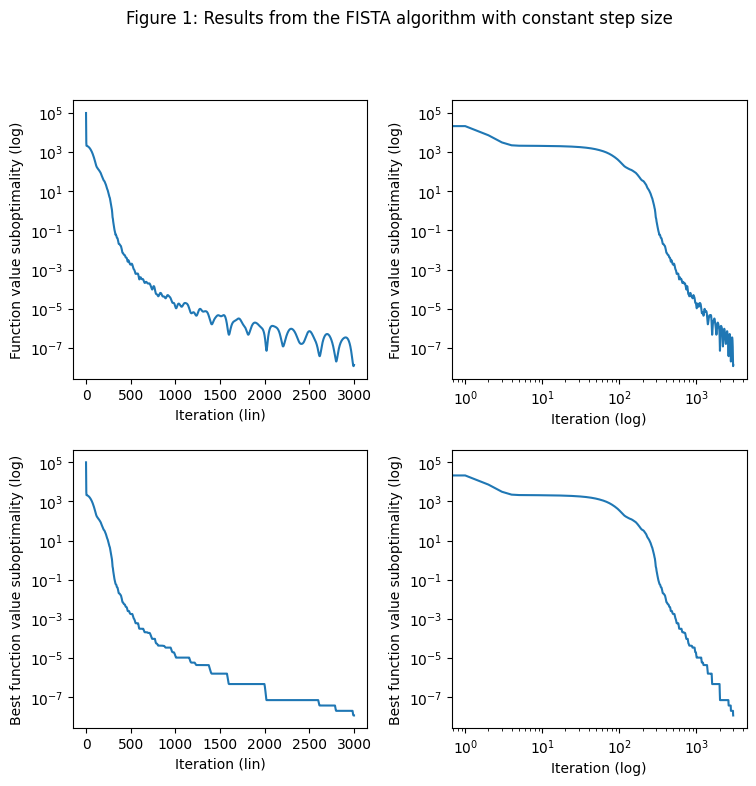

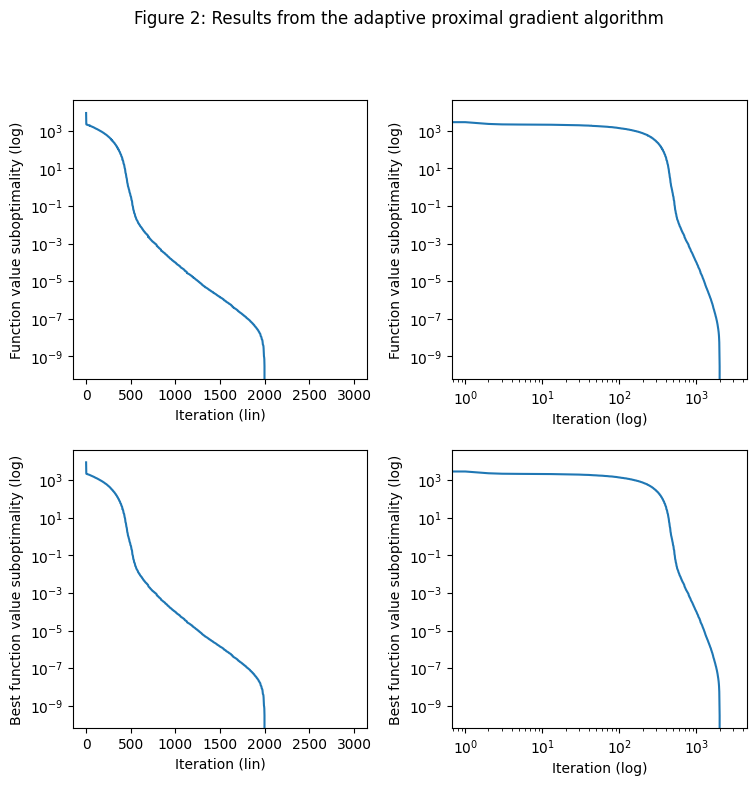

In [9]:
# Plotting the results:
fig, axs = plt.subplots(2,2, figsize=(8, 8))
fig.suptitle('Figure 1: Results from the FISTA algorithm with constant step size')

plt.tight_layout(pad=3.0)
axs[0, 0].plot(objective_values_fista - cvxpy_optimal_value)
axs[0, 0].set_xlabel('Iteration (lin)')
axs[0, 0].set_ylabel('Function value suboptimality (log)')
axs[0, 0].set_yscale('log')

axs[0, 1].plot(objective_values_fista - cvxpy_optimal_value)
axs[0, 1].set_xlabel('Iteration (log)')
axs[0, 1].set_xscale('log')
axs[0, 1].set_ylabel('Function value suboptimality (log)')
axs[0, 1].set_yscale('log')

axs[1, 0].plot(x_best_evals_fista - cvxpy_optimal_value)
axs[1, 0].set_xlabel('Iteration (lin)')
axs[1, 0].set_ylabel('Best function value suboptimality (log)')
axs[1, 0].set_yscale('log')

axs[1, 1].plot(x_best_evals_fista - cvxpy_optimal_value)
axs[1, 1].set_xlabel('Iteration (log)')
axs[1, 1].set_xscale('log')
axs[1, 1].set_ylabel('Best function value suboptimality (log)')
axs[1, 1].set_yscale('log')

# Plotting the results:
fig, axs = plt.subplots(2,2, figsize=(8, 8))
fig.suptitle('Figure 2: Results from the adaptive proximal gradient algorithm')

plt.tight_layout(pad=3.0)
axs[0, 0].plot(objective_values_apg - cvxpy_optimal_value)
axs[0, 0].set_xlabel('Iteration (lin)')
# axs[0, 0].set_xlim([0, 1300])
axs[0, 0].set_ylabel('Function value suboptimality (log)')
axs[0, 0].set_yscale('log')

axs[0, 1].plot(objective_values_apg - cvxpy_optimal_value)
axs[0, 1].set_xlabel('Iteration (log)')
axs[0, 1].set_xscale('log')
axs[0, 1].set_ylabel('Function value suboptimality (log)')
axs[0, 1].set_yscale('log')

axs[1, 0].plot(x_best_evals_apg - cvxpy_optimal_value)
axs[1, 0].set_xlabel('Iteration (lin)')
# axs[1, 0].set_xlim([0, 1300])
axs[1, 0].set_ylabel('Best function value suboptimality (log)')
axs[1, 0].set_yscale('log')

axs[1, 1].plot(x_best_evals_apg - cvxpy_optimal_value)
axs[1, 1].set_xlabel('Iteration (log)')
axs[1, 1].set_xscale('log')
axs[1, 1].set_ylabel('Best function value suboptimality (log)')
axs[1, 1].set_yscale('log')

# Theory

Before analyzing the results we first state two theorems from the papers:

From the paper by A. Beck and M. Teboulle we have the following theorem, which we will call Theorem 1:

Let $x_k, y_k$ be generated by FISTA. Then for any $k \geq 1$

\begin{equation*}
    F(x_k) − F(x^\ast) \leq \frac {2 \alpha L(f) || x_0 − x^\ast ||_2^2}{(k + 1)^2} , \quad \forall \text{ solutions } x^\ast 
\end{equation*}

where $\alpha = 1$ for the constant stepsize setting and $\alpha = \eta$ for the backtracking stepsize setting.

From the paper by Y. Malitsky and K. Mishchenko we have the following theorem, which we will call Theorem 2: 

Let $f$ be convex with a locally Lipschitz gradient $\nabla f$ and $g$ be convex and lower semi-continuous. Then the
sequence $(x_k)$ generated by the adaptive proximal gradient algorithm converges to a solution of (1) and

\begin{equation*}
    \underset{i \in [k]}{\text{min}} (F(x_i) - F(x^\ast)) \leq \frac{R^2}{2 \sum_{i=1}^k \alpha_i}
\end{equation*}

In particular, if $\alpha_0$ satisfies: 

\begin{equation*}
    \alpha_0 L_1 \in [\frac{1}{\sqrt{2}}, 2]
\end{equation*}

then:

\begin{equation*}
    \underset{i \in [k]}{\text{min}} (F(x_i) - F(x^\ast)) \leq \frac{L R^2}{\sqrt{2}k}
\end{equation*}

where $L$ is the Lipschitz constant of $\nabla f$ over $B(x^\ast, R)$, and $x^\ast$ is a solution to (1).

# Analysis
We note that since $f$ is convex and differentiable everywhere, and that according to example 2.2 in the paper by A. Beck and M. Teboulle it has a locally Lipschitz gradient, it conforms to the requirements of Theorems 1 and 2. Additionally, we note that $g$ is convex and continous, and also conforms to the requirements of Theorems 1 and 2.

In the Theorems mentioned above, since our choices of $f$ and $g$ fulfill the requirements, the upper bound on the function value suboptimality and the best function value suboptimality are on the form of sublinear rates. 

In the FISTA algorithm, the results seem to correspond well to this theory, where the upper bound for the function value suboptimality behaves like a sublinear rate. This can be observed in the lin-log plots in Figure 1.

For the adaptive proximal gradient algorithm, the results seem to outperform the theoretical upper bound: a sublinear rate. The results behave like an  linear and at some iterations almost superlinear rate when converging towards the solution that was calculated by using the cvxpy Python package. This could be the result of the Lasso problem being strongly convex, which is not required by the algorithm, and therefore the algorithm can outperform its theoretical upper bounds. This can be observed in the lin-log plots in Figure 2.

In both cases, the results conform to the theoretical upper bounds on the function value suboptimality, which is an indication that the implementation of the Algorithms are correctly implemented.